# Visualize samples

In [143]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import skimage.io as io
import time
from IPython.display import clear_output
import csv
import random
import os

plt.rcParams['figure.figsize'] = (15.0, 20.0)

In [137]:
# Load annotations
folder = "nightClip5"

path = "./Annotations/Annotations/nightTrain/" + folder + "/"
filename = "frameAnnotationsBOX.csv"
anns = pd.read_csv(path+filename, delimiter=";")
df = pd.DataFrame(anns)
num_samples = len(df["Filename"].unique())
print("Number of samples: {}".format(num_samples))

Number of samples: 1094


In [138]:
def show_sample(anns, folder, sample):
    """
    anns   -- Dataframe of annotations, index just a number
    sample -- Integer
    """
    name = list(set(anns["Filename"]))[sample]
    img_file = name.split('/')[1]
    path = "./nightTrain/nightTrain/" + folder+ "/frames/"
    img = io.imread(path+img_file)

    # BB
    df_slice = anns.loc[anns["Filename"] == name][["Upper left corner X", "Upper left corner Y", "Lower right corner X", "Lower right corner Y"]]
    
    # Label
    label = anns.loc[anns["Filename"] == name]["Annotation tag"].tolist()[0]
    #print("Label: {}".format(label))
    colours = {'stop':'red', 'go':'green'}

    # Visualize
    fig, ax = plt.subplots()
    for row in df_slice.index:
        box = df_slice.loc[row].tolist()
        x = box[0]
        y = box[3]
        h = box[1] - box[3]
        w = box[2] - box[0]
        bb = patches.Rectangle((x,y), w, h, linewidth=2, edgecolor=colours[label], facecolor='none')
        plt.text(x+5, y+h-12, label,fontdict={'fontsize':8.0, 'fontweight':'medium','color': 'white', 'backgroundcolor': colours[label]})
        ax.add_patch(bb)

    ax.imshow(img)
    ax.axis("off")
    plt.show()

In [139]:
samples = np.arange(0,num_samples)
samples = random.choices(samples, k=10)

for sample in samples:
    show_sample(anns, folder, sample)
    time.sleep(1)
    clear_output()

KeyError: 'goLeft'

In [140]:
samples

[1091, 289, 5, 110, 611, 124, 800, 179, 476, 735]

In [119]:
# Get list of image names based on
def write_image_names(anns, samples):
    names = []

    for sample in samples:

        name = list(set(anns["Filename"]))[sample]
        img_file = name.split('/')[1]
        path = "./nightTrain/nightTrain/" + folder+ "/frames/"

        names.append(path+img_file)

    filename_out = 'to_annotate-day4.txt'
    with open(filename_out, 'w') as f:
        for line in names:
            f.write(line+"\n")


    return names


In [141]:
ids = [1091, 289, 5, 110, 611, 124, 800, 179, 476, 735]
ids = samples

names = write_image_names(anns, ids)
names

['./nightTrain/nightTrain/nightClip5/frames/nightClip5--00657.jpg',
 './nightTrain/nightTrain/nightClip5/frames/nightClip5--00222.jpg',
 './nightTrain/nightTrain/nightClip5/frames/nightClip5--01235.jpg',
 './nightTrain/nightTrain/nightClip5/frames/nightClip5--00603.jpg',
 './nightTrain/nightTrain/nightClip5/frames/nightClip5--00613.jpg',
 './nightTrain/nightTrain/nightClip5/frames/nightClip5--01155.jpg',
 './nightTrain/nightTrain/nightClip5/frames/nightClip5--01171.jpg',
 './nightTrain/nightTrain/nightClip5/frames/nightClip5--00644.jpg',
 './nightTrain/nightTrain/nightClip5/frames/nightClip5--00472.jpg',
 './nightTrain/nightTrain/nightClip5/frames/nightClip5--00006.jpg']

# Use unannotated sequences

In [166]:
def sample_image_filenames(folder, num_samples=10):
    path = "./" + folder + "/" + folder + "/frames/"

    filenames = os.listdir(path)
    print("Found {} images in folder {}.".format(len(filenames), folder))   
    samples = random.choices(filenames, k=num_samples)

    return samples

In [160]:
def show_images(image_name):
    """
    sample -- Integer
    """
    # Infer file path
    folder = image_name.split('--')[0]
    path = "./" + folder + "/" + folder + "/frames/"
    img = io.imread(path+image_name)
    
    # Visualize
    fig, ax = plt.subplots()
       
    ax.imshow(img)
    ax.axis("off")
    plt.show()

In [161]:
# Get list of image names based on
def write_image_names_testing(samples):

    names = []
    for sample in samples:
        folder = sample.split('--')[0]
        path = "./" + folder + "/" + folder + "/frames/"
        names.append(path+sample)

    filename_out = 'to_annotate-day4.txt'
    with open(filename_out, 'w') as f:
        for line in names:
            f.write(line+"\n")


    return names

In [181]:
name = "nightSequence2"

samples = sample_image_filenames(name, num_samples=30)

Found 6534 images in folder nightSequence2.


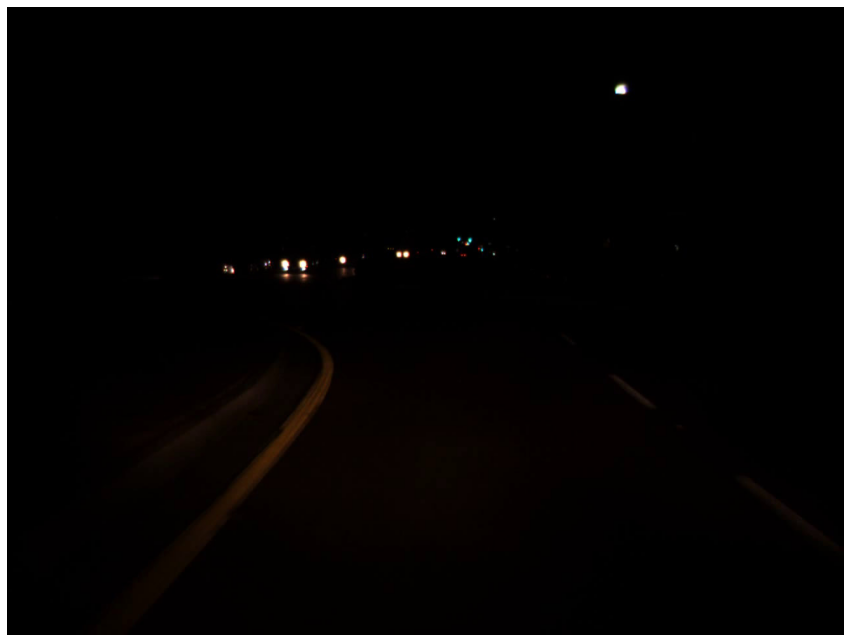

KeyboardInterrupt: 

In [182]:
for sample in samples:
    show_images(sample)
    time.sleep(1)
    clear_output()

In [183]:
write_image_names_testing(samples)

['./nightSequence2/nightSequence2/frames/nightSequence2--04283.jpg',
 './nightSequence2/nightSequence2/frames/nightSequence2--03430.jpg',
 './nightSequence2/nightSequence2/frames/nightSequence2--03958.jpg',
 './nightSequence2/nightSequence2/frames/nightSequence2--04710.jpg',
 './nightSequence2/nightSequence2/frames/nightSequence2--04335.jpg',
 './nightSequence2/nightSequence2/frames/nightSequence2--03683.jpg',
 './nightSequence2/nightSequence2/frames/nightSequence2--03962.jpg',
 './nightSequence2/nightSequence2/frames/nightSequence2--06409.jpg',
 './nightSequence2/nightSequence2/frames/nightSequence2--04067.jpg',
 './nightSequence2/nightSequence2/frames/nightSequence2--01570.jpg',
 './nightSequence2/nightSequence2/frames/nightSequence2--02681.jpg',
 './nightSequence2/nightSequence2/frames/nightSequence2--04556.jpg',
 './nightSequence2/nightSequence2/frames/nightSequence2--04760.jpg',
 './nightSequence2/nightSequence2/frames/nightSequence2--01331.jpg',
 './nightSequence2/nightSequence2/